In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [23]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['sift_correspondences'].shape, outs_dict['siftflow_correspondences'].shape

((727, 4), (6000, 4))

In [26]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
sift_correspondences = outs_dict['sift_correspondences']
siftflow_correspondences = outs_dict['siftflow_correspondences']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

sift_correspondences[:10], h, w, siftflow_correspondences[:10]

(array([[  6.5385685 , 228.13934326, 404.22628784, 118.50107574],
        [  8.33604431, 218.49304199,  10.39498901, 221.04277039],
        [ 23.90296173, 160.23158264, 669.41522217,  60.53141785],
        [ 33.19649506, 153.11332703, 676.27349854, 144.15643311],
        [ 39.81171799, 233.86526489, 291.83859253, 155.36372375],
        [ 44.70667648,  44.68857193, 221.34637451,  19.07941437],
        [ 83.52727509, 234.35673523, 521.68084717, 182.76234436],
        [ 90.17958832, 195.15863037,  58.37298965, 203.13809204],
        [ 90.17958832, 195.15863037,  58.37298965, 203.13809204],
        [ 91.94967651,  13.67276573,  58.3623085 ,   5.86644697]]),
 256.0,
 416.0,
 array([[ 82.        ,  49.        ,  49.09012985,  42.3329277 ],
        [ 82.        ,  49.        ,  49.09012985,  42.3329277 ],
        [ 96.        ,  85.        ,  66.61156464,  82.20549011],
        [ 98.        , 128.        ,  73.15995026, 128.96096802],
        [ 98.        ,  72.        ,  69.11868286,  67.874

SIFT MATCHES

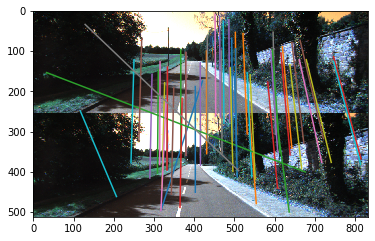

In [34]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, sift_correspondences.shape[0])
    plt.plot([sift_correspondences[idx][0], sift_correspondences[idx][2]], [sift_correspondences[idx][1], sift_correspondences[idx][3] + h])

plt.savefig('sift_sampled_correspondences.png')

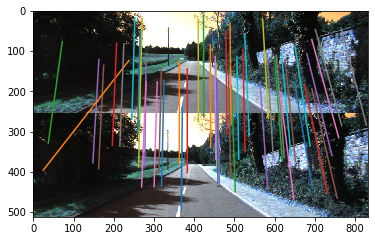

In [35]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, siftflow_correspondences.shape[0])
    plt.plot([siftflow_correspondences[idx][0], siftflow_correspondences[idx][2]], [siftflow_correspondences[idx][1], siftflow_correspondences[idx][3] + h])

plt.savefig('siftflow_sampled_correspondence_out.png')